## Courts and Rinks in Pittsburgh

The dataset that I will be using is titled "City Courts and Rinks"

Link to the dataset: https://data.wprdc.org/dataset/city-of-pittsburgh-courts

When considering what neighborhood is the most family-friendly, I decided to look at the courts and rinks in Pittsburgh.
You may be asking, "Why courts and rinks?". Well, when raising a family, sports and physical activity is an important aspect of both childhood and family life. Sports play an important role in the life of many children and teenagers, as it provides them with an activity to fill their time with, make friends, and gain skills. Having access to courts and rinks provides an outlet for children and a day activity for family life.

In [3]:
#A bunch of imports so that we can analyze and visualize the courts and rinks dataset!
import pandas as pd 
import numpy as np
import matplotlib as mpl
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

So, let's start with just looking at the dataset

In [6]:
court = pd.read_csv("courtsAndRinks.csv") #Reading in the data file
court.head(246) #Printing all of the entries

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1256692000,Riverview Park Tennis Court 2,Tennis,Riverview Park,NaN,NaN,0,NaN,Perry North,1,26,42003980400,1,26,1,1-15,40.482342,-80.022263
242,1802795636,West End Park Basketball Court,Basketball (Half),West End Park,NaN,Asphalt,0,NaN,Elliott,2,20,42003562600,5,20,6,1-17,40.437395,-80.036929
243,529313558,Frick Park Pickleball Court 1,Pickleball,Frick Park,NaN,Asphalt,0,NaN,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429997,-79.914029
244,1330544431,Frick Park Pickleball Court 2,Pickleball,Frick Park,NaN,Asphalt,0,NaN,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429906,-79.914023


One thing that is important to consider when looking at this dataset is that there is a column titled "inactive". We don't want to consider courts that are inactive, and therefore we should get rid of the courts and rinks that are considered not active before we continue with our analysis.

In [7]:
activeCourt = court.query('inactive == "f"') #Filtering out inactive courts 
activeCourt.head(229) #Print out the dataset again, but this time with only active courts

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1290615572,Moore Park Pickleball Court 1,Pickleball,Moore Park,NaN,NaN,0,f,Brookline,4,19,42003191700,5,19,6,4-26,40.404887,-80.014715
225,1066241176,Moore Park Pickleball Court 2,Pickleball,Moore Park,NaN,NaN,0,f,Brookline,4,19,42003191700,5,19,6,4-26,40.404821,-80.014735
226,452184,Schenley Park Pickleball Court 2,Pickleball,Schenley Park,NaN,Asphalt,0,f,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431925,-79.943224
227,1837773733,Schenley Park Pickleball Court 3,Pickleball,Schenley Park,NaN,Asphalt,0,f,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.431742,-79.943177


One thing I want to look at when looking at this dataset is the amount of courts and rinks found within each neighborhood.

In [8]:
activeCourt['neighborhood'].value_counts() #Printing out all of counts of each of the neighborhood


Squirrel Hill South         23
Highland Park               20
Hazelwood                   10
Beltzhoover                  9
Brookline                    9
Allegheny Center             8
Beechview                    7
Manchester                   6
East Liberty                 6
Lower Lawrenceville          6
Regent Square                6
Sheraden                     6
Terrace Village              5
Mount Washington             5
South Side Slopes            5
South Side Flats             5
Greenfield                   5
Bloomfield                   5
Lincoln Place                4
Elliott                      4
Spring Hill-City View        4
Morningside                  4
Troy Hill                    3
Garfield                     3
Crafton Heights              3
Carrick                      3
Oakwood                      3
Banksville                   3
Duquesne Heights             2
Upper Lawrenceville          2
Bedford Dwellings            2
Lincoln-Lemington-Belmar     2
East Hil

Looking at this, this result tells us that Squirrel Hill South has the largest number of courts and rinks out of all of the neighboorhood.

The number of courts is a good way of looking at this data. This tells us how many active courts and rinks there are per neighborhood, and provides the most availability to families for options on where to play sports at.

Now, let's visualize this data using a bar graph.

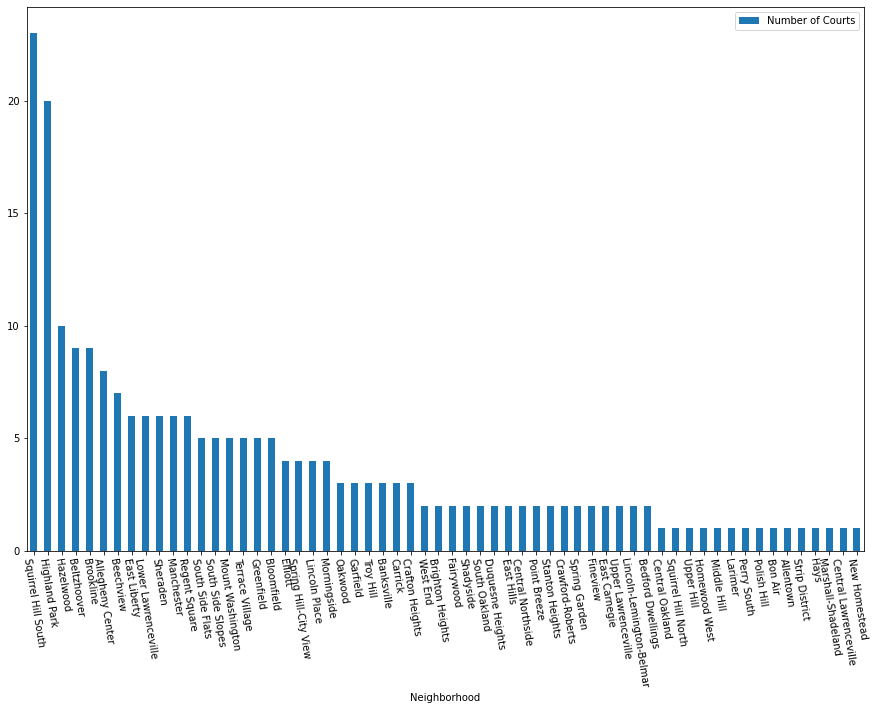

In [9]:
courtGraph = pd.DataFrame({'Neighborhood':['Squirrel Hill South', 'Highland Park', 'Hazelwood', 'Beltzhoover', 'Brookline', 'Allegheny Center', 'Beechview', 'East Liberty', 'Lower Lawrenceville', 'Sheraden', 'Manchester', 'Regent Square', 'South Side Flats', 'South Side Slopes', 'Mount Washington', 'Terrace Village', 'Greenfield', 'Bloomfield', 'Elliott', 'Spring Hill-City View', 'Lincoln Place', 'Morningside','Oakwood', 'Garfield', 'Troy Hill', 'Banksville', 'Carrick', 'Crafton Heights', 'West End',  'Brighton Heights',  'Fairywood',  'Shadyside', 'South Oakland',  'Duquesne Heights',   'East Hills', 'Central Northside',  'Point Breeze', 'Stanton Heights',  'Crawford-Roberts', 'Spring Garden',  'Fineview', 'East Carnegie', 'Upper Lawrenceville',  'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Central Oakland', 'Squirrel Hill North',  'Upper Hill', 'Homewood West', 'Middle Hill', 'Larimer', 'Perry South', 'Polish Hill', 'Bon Air', 'Allentown', 'Strip District', 'Hays', 'Marshall-Shadeland', 'Central Lawrenceville', 'New Homestead'], 'Number of Courts':[23, 20, 10, 9, 9, 8, 7, 6, 6, 6, 6, 6, 5, 5, 5,  5, 5, 5,  4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,]})
ax = courtGraph.plot.bar(x='Neighborhood', y='Number of Courts', rot=999999999, figsize =(15, 10))

This gives us a nice visualization for our data. The majority of neighborhoods have less than 5 courts and rinks, while a few neighborhoods have between 5 and 10 parks and rinks, and two neighborhoods have more than 20 courts and rinks. 

The number of courts and rinks per neighborhood provides us with a useful bit of information to work with. However, this doesn't paint the entire picture of the courts and rinks in Pittsburgh. The next thing I want to look at is which neighborhood has the greatest diversity of sports in terms of courts and rinks. Obviously, have a large number of courts is nice but it doesn't give families much variety if all of the courts are only one or two sports.

In [17]:
squirrelHillSouth = activeCourt.query('neighborhood == "Squirrel Hill South"')
shs = squirrelHillSouth['type'].nunique()
print("Squirrel Hill South has: ")
print(shs)
print("different sports")
print()

highlandPark = activeCourt.query('neighborhood == "Highland Park"')
hp = highlandPark['type'].nunique()
print("highlandPark has: ")
print(hp)
print("different sports")
print()

hazelwood = activeCourt.query('neighborhood == "Hazelwood"')
hw = hazelwood['type'].nunique()
print("hazelwood has: ")
print(hw)
print("different sports")
print()

beltzhoover  = activeCourt.query('neighborhood == "Beltzhoover"')
bh = beltzhoover ['type'].nunique()
print("Beltzhoover has: ")
print(bh)
print("different sports")
print()

brookline = activeCourt.query('neighborhood == "Brookline"')
bl = brookline['type'].nunique()
print("Brookline has: ")
print(bl)
print("different sports")
print()

alleghenyCenter = activeCourt.query('neighborhood == "Allegheny Center"')
ac = alleghenyCenter['type'].nunique()
print("Allegheny Center has: ")
print(ac)
print("different sports")
print()

beechview  = activeCourt.query('neighborhood == "Beechview"')
bv = beechview['type'].nunique()
print("Beechview has: ")
print(bv)
print("different sports")
print()

eastLiberty = activeCourt.query('neighborhood == "East Liberty"')
el = eastLiberty['type'].nunique()
print("East Liberty has: ")
print(el)
print("different sports")
print()

lowerLawrenceville  = activeCourt.query('neighborhood == "Lower Lawrenceville"')
ll = lowerLawrenceville['type'].nunique()
print("Lower Lawrenceville has: ")
print(ll)
print("different sports")
print()

sheraden  = activeCourt.query('neighborhood == "Sheraden"')
sd = sheraden['type'].nunique()
print("Sheraden has: ")
print(sd)
print("different sports")
print()

manchester = activeCourt.query('neighborhood == "Manchester"')
mr = manchester['type'].nunique()
print("Manchester: ")
print(mr)
print("different sports")
print()

regentSquare = activeCourt.query('neighborhood == "Regent Square"')
rs = regentSquare['type'].nunique()
print("Regent Square has: ")
print(rs)
print("different sports")
print()

southSideFlats = activeCourt.query('neighborhood == "South Side Flats"')
ssf = southSideFlats['type'].nunique()
print("South Side Flats has: ")
print(ssf)
print("different sports")
print()

southSideSlopes  = activeCourt.query('neighborhood == "South Side Slopes"')
ssl = southSideSlopes['type'].nunique()
print("South Side Slopes has: ")
print(ssl)
print("different sports")
print()

mountWashington = activeCourt.query('neighborhood == "Mount Washington"')
mw = mountWashington['type'].nunique()
print("Mount Washington has: ")
print(mw)
print("different sports")
print()

terraceVillage  = activeCourt.query('neighborhood == "Terrace Village"')
tv = terraceVillage['type'].nunique()
print("Terrace Village has: ")
print(tv)
print("different sports")
print()

greenfield = activeCourt.query('neighborhood == "Greenfield"')
gd = greenfield['type'].nunique()
print("Greenfield has: ")
print(gd)
print("different sports")
print()

bloomfield  = activeCourt.query('neighborhood == "Bloomfield"')
bd = bloomfield['type'].nunique()
print("Bloomfield has: ")
print(bd)
print("different sports")
print()

elliott  = activeCourt.query('neighborhood == "Elliott"')
elt = elliott['type'].nunique()
print("Elliott has: ")
print(elt)
print("different sports")
print()

springHillCityView  = activeCourt.query('neighborhood == "Spring Hill-City View"')
shcv = springHillCityView ['type'].nunique()
print("Spring Hill-City View has: ")
print(shcv)
print("different sports")
print()

lincolnPlace  = activeCourt.query('neighborhood == "Lincoln Place"')
lpe = lincolnPlace['type'].nunique()
print("Lincoln Place has: ")
print(lpe)
print("different sports")
print()

morningside = activeCourt.query('neighborhood == "Morningside"')
mge = morningside['type'].nunique()
print("Morningside has: ")
print(mge)
print("different sports")
print()

oakwood  = activeCourt.query('neighborhood == "Oakwood"')
okwd = oakwood['type'].nunique()
print("Oakwood has: ")
print(okwd)
print("different sports")
print()

garfield = activeCourt.query('neighborhood == "Garfield"')
gfd = garfield['type'].nunique()
print("Garfield has: ")
print(gfd)
print("different sports")
print()

troyHill = activeCourt.query('neighborhood == "Troy Hill"')
thl = troyHill['type'].nunique()
print("Troy Hill has: ")
print(thl)
print("different sports")
print()

banksville  = activeCourt.query('neighborhood == "Banksville"')
bkve = banksville['type'].nunique()
print("Banksville has: ")
print(bkve)
print("different sports")
print()

carrick  = activeCourt.query('neighborhood == "Carrick"')
crck = carrick['type'].nunique()
print("Carrick has: ")
print(crck)
print("different sports")
print()

craftonHeights = activeCourt.query('neighborhood == "Crafton Heights"')
cfhs = craftonHeights['type'].nunique()
print("Crafton Heights has: ")
print(cfhs)
print("different sports")
print()

westEnd  = activeCourt.query('neighborhood == "West End"')
we = westEnd['type'].nunique()
print("westEnd has: ")
print(we)
print("different sports")
print()

brightonHeights = activeCourt.query('neighborhood == "Brighton Heights"')
brht = brightonHeights['type'].nunique()
print("Brighton Heights has: ")
print(brht)
print("different sports")
print()

fairywood  = activeCourt.query('neighborhood == "Fairywood"')
fwd = fairywood ['type'].nunique()
print("Fairywood has: ")
print(fwd)
print("different sports")
print()

shadyside  = activeCourt.query('neighborhood == "Shadyside"')
sdys = shadyside['type'].nunique()
print("Shadyside has: ")
print(sdys)
print("different sports")
print()

southOakland  = activeCourt.query('neighborhood == "South Oakland"')
sod = southOakland ['type'].nunique()
print("South Oakland  has: ")
print(sod)
print("different sports")
print()

duquesneHeights   = activeCourt.query('neighborhood == "Duquesne Heights"')
dhs = duquesneHeights['type'].nunique()
print("Duquesne Heights has: ")
print(dhs)
print("different sports")
print()

eastHills  = activeCourt.query('neighborhood == "East Hills"')
ehs = eastHills['type'].nunique()
print("East Hills has: ")
print(ehs)
print("different sports")
print()

centralNorthside  = activeCourt.query('neighborhood == "Central Northside"')
cne = centralNorthside['type'].nunique()
print("Central Northside has: ")
print(cne)
print("different sports")
print()

pointBreeze = activeCourt.query('neighborhood == "Point Breeze"')
pbe = pointBreeze['type'].nunique()
print("Point Breeze has: ")
print(pbe)
print("different sports")
print()

stantonHeights  = activeCourt.query('neighborhood == "Stanton Heights"')
sths = stantonHeights['type'].nunique()
print("Stanton Heights has: ")
print(sths)
print("different sports")
print()

crawfordRoberts  = activeCourt.query('neighborhood == "Crawford-Roberts"')
crs = crawfordRoberts['type'].nunique()
print("Crawford-Roberts has: ")
print(crs)
print("different sports")
print()

springGarden = activeCourt.query('neighborhood == "Spring Garden"')
sgn = springGarden['type'].nunique()
print("Spring Garden has: ")
print(sgn)
print("different sports")
print()

fineview = activeCourt.query('neighborhood == "Fineview"')
fvw = fineview['type'].nunique()
print("Fineview has: ")
print(fvw)
print("different sports")
print()

eastCarnegie  = activeCourt.query('neighborhood == "East Carnegie"')
ece = eastCarnegie['type'].nunique()
print("East Carnegie has: ")
print(ece)
print("different sports")
print()

upperLawrenceville = activeCourt.query('neighborhood == "Upper Lawrenceville"')
ule = upperLawrenceville['type'].nunique()
print("Upper Lawrenceville has: ")
print(ule)
print("different sports")
print()

lincolnLemingtonBelmar = activeCourt.query('neighborhood == "Lincoln-Lemington-Belmar"')
llb = lincolnLemingtonBelmar['type'].nunique()
print("Lincoln-Lemington-Belmar has: ")
print(llb)
print("different sports")
print()

bedfordDwellings   = activeCourt.query('neighborhood == "Bedford Dwellings"')
bds = bedfordDwellings['type'].nunique()
print("Bedford Dwellings has: ")
print(bds)
print("different sports")
print()

centralOakland  = activeCourt.query('neighborhood == "Central Oakland"')
cod = centralOakland['type'].nunique()
print("Central Oakland has: ")
print(cod)
print("different sports")
print()

squirrelHillNorth = activeCourt.query('neighborhood == "Squirrel Hill North"')
shn = squirrelHillNorth['type'].nunique()
print("Squirrel Hill North has: ")
print(shn)
print("different sports")
print()

upperHill  = activeCourt.query('neighborhood == "Upper Hill"')
upl = upperHill['type'].nunique()
print("Upper Hill has: ")
print(upl)
print("different sports")
print()

homewoodWest  = activeCourt.query('neighborhood == "Homewood West"')
hww = homewoodWest['type'].nunique()
print("Homewood West has: ")
print(hww)
print("different sports")
print()

middleHill  = activeCourt.query('neighborhood == "Middle Hill"')
mhl = middleHill['type'].nunique()
print("Middle Hill has: ")
print(mhl)
print("different sports")
print()

larimer = activeCourt.query('neighborhood == "Larimer"')
lrr = larimer['type'].nunique()
print("Larimer has: ")
print(lrr)
print("different sports")
print()

perrySouth = activeCourt.query('neighborhood == "Perry South"')
psh = perrySouth['type'].nunique()
print("Perry South has: ")
print(psh)
print("different sports")
print()

polishHill  = activeCourt.query('neighborhood == "Polish Hill"')
phl = polishHill['type'].nunique()
print("Polish Hill has: ")
print(phl)
print("different sports")
print()

bonAir = activeCourt.query('neighborhood == "Bon Air"')
ba = bonAir['type'].nunique()
print("Bon Air has: ")
print(ba)
print("different sports")
print()

allentown  = activeCourt.query('neighborhood == "Allentown"')
aln = allentown['type'].nunique()
print("Allentown has: ")
print(aln)
print("different sports")
print()

stripDistrict = activeCourt.query('neighborhood == "Strip District"')
sdt = stripDistrict['type'].nunique()
print("Strip District has: ")
print(sdt)
print("different sports")
print()

hays  = activeCourt.query('neighborhood == "Hays"')
hys = hays['type'].nunique()
print("Hays has: ")
print(hys)
print("different sports")
print()

marshallShadeland = activeCourt.query('neighborhood == "Marshall-Shadeland"')
msd = marshallShadeland['type'].nunique()
print("Marshall-Shadeland has: ")
print(msd)
print("different sports")
print()

centralLawrenceville = activeCourt.query('neighborhood == "Central Lawrenceville"')
clv = centralLawrenceville['type'].nunique()
print("Central Lawrenceville has: ")
print(clv)
print("different sports")
print()

newHomestead = activeCourt.query('neighborhood == "New Homestead"')
nhd = newHomestead['type'].nunique()
print("New Homestead has: ")
print(nhd)
print("different sports")

Squirrel Hill South has: 
6
different sports

highlandPark has: 
5
different sports

hazelwood has: 
4
different sports

Beltzhoover has: 
3
different sports

Brookline has: 
5
different sports

Allegheny Center has: 
3
different sports

Beechview has: 
3
different sports

East Liberty has: 
3
different sports

Lower Lawrenceville has: 
3
different sports

Sheraden has: 
3
different sports

Manchester: 
3
different sports

Regent Square has: 
1
different sports

South Side Flats has: 
4
different sports

South Side Slopes has: 
3
different sports

Mount Washington has: 
3
different sports

Terrace Village has: 
2
different sports

Greenfield has: 
3
different sports

Bloomfield has: 
4
different sports

Elliott has: 
3
different sports

Spring Hill-City View has: 
3
different sports

Lincoln Place has: 
3
different sports

Morningside has: 
2
different sports

Oakwood has: 
2
different sports

Garfield has: 
2
different sports

Troy Hill has: 
2
different sports

Banksville has: 
3
dif

From the print statements, we can tell that the neighborhood with the greatest amount of different sports is Squirrel Hill South. This is not a surprising result, as we determined earlier that the neighborhood with the greatest number of sports is Squirrel Hill South. 

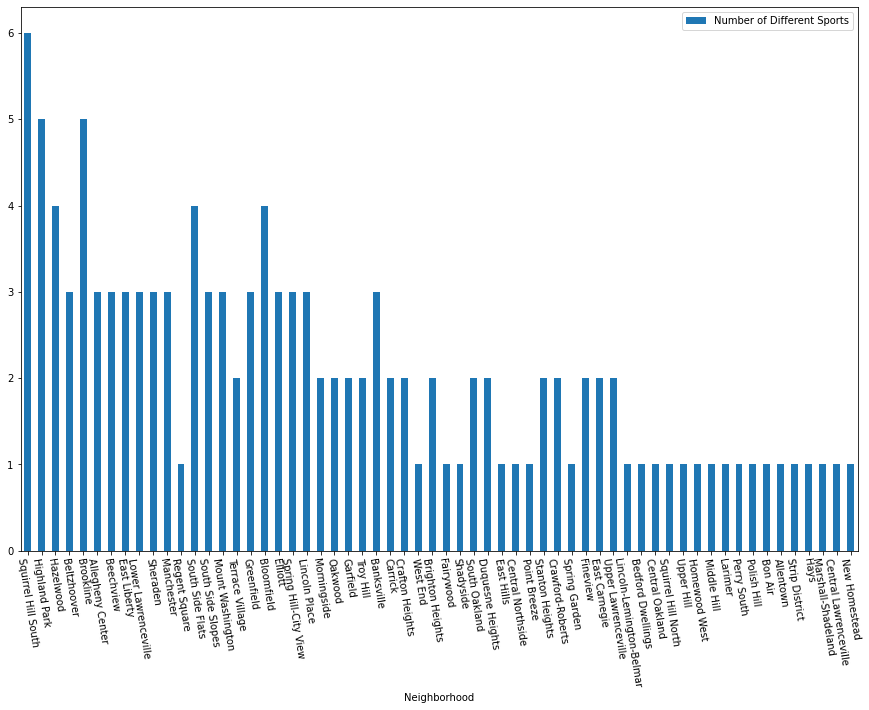

In [18]:
numSports = pd.DataFrame({'Neighborhood':['Squirrel Hill South', 'Highland Park', 'Hazelwood', 'Beltzhoover', 'Brookline', 'Allegheny Center', 'Beechview', 'East Liberty', 'Lower Lawrenceville', 'Sheraden', 'Manchester', 'Regent Square', 'South Side Flats', 'South Side Slopes', 'Mount Washington', 'Terrace Village', 'Greenfield', 'Bloomfield', 'Elliott', 'Spring Hill-City View', 'Lincoln Place', 'Morningside','Oakwood', 'Garfield', 'Troy Hill', 'Banksville', 'Carrick', 'Crafton Heights', 'West End',  'Brighton Heights',  'Fairywood',  'Shadyside', 'South Oakland',  'Duquesne Heights',   'East Hills', 'Central Northside',  'Point Breeze', 'Stanton Heights',  'Crawford-Roberts', 'Spring Garden',  'Fineview', 'East Carnegie', 'Upper Lawrenceville',  'Lincoln-Lemington-Belmar', 'Bedford Dwellings', 'Central Oakland', 'Squirrel Hill North',  'Upper Hill', 'Homewood West', 'Middle Hill', 'Larimer', 'Perry South', 'Polish Hill', 'Bon Air', 'Allentown', 'Strip District', 'Hays', 'Marshall-Shadeland', 'Central Lawrenceville', 'New Homestead'], 'Number of Different Sports':[6, 5, 4, 3, 5, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})
ax = numSports.plot.bar(x='Neighborhood', y='Number of Different Sports', rot=999999999, figsize =(15, 10))

This, once again, gives us a nice visualization for our data. From this data, we can easily see that Squirrel Hill South has the greatest number of sports in terms of courts and rinks with 6 different sports. Highland Park and Allegheny Center both are close seconds with 5 different sports.

## Conclusion 

In [ ]:
Looking at both the number of sports and the different types of sports, Squirrel Hill South t